# Default Credit Card Clients - Predictive model 




# Dataset details

## Default Payments of Credit Card Clients in Taiwan from 2005
(https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset)

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005

## Content
There are 25 variables:
*	ID: ID of each client
*	LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
*	SEX: Gender (1=male, 2=female)
*	EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
*	MARRIAGE: Marital status (1=married, 2=single, 3=others)
*	AGE: Age in years
*	PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
*	PAY_2: Repayment status in August, 2005 (scale same as above)
*	PAY_3: Repayment status in July, 2005 (scale same as above)
*	PAY_4: Repayment status in June, 2005 (scale same as above)
*	PAY_5: Repayment status in May, 2005 (scale same as above)
*	PAY_6: Repayment status in April, 2005 (scale same as above)
*	BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
*	BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
*	BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
*	BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
*	BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
*	BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
*	PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
*	PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
*	PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
*	PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
*	PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
*	PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
*	default.payment.next.month: Default payment (1=yes, 0=no)


## Acknowledgements

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Data ingestion

In [2]:
dataset = pd.read_csv('./data/UCI_Credit_Card.csv')

# Glimpse at the data

In [3]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
dataset.shape

(30000, 25)

In [5]:
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Calculate outstanding amount

In [6]:
dataset['APR-Outstanding']= dataset['BILL_AMT6']-dataset['PAY_AMT6']
dataset['MAY-Outstanding']= dataset['BILL_AMT5']-dataset['PAY_AMT5']
dataset['JUN-Outstanding']= dataset['BILL_AMT4']-dataset['PAY_AMT4']
dataset['JUL-Outstanding']= dataset['BILL_AMT3']-dataset['PAY_AMT3']
dataset['AUG-Outstanding']= dataset['BILL_AMT2']-dataset['PAY_AMT2']
dataset['SEP-Outstanding']= dataset['BILL_AMT1']-dataset['PAY_AMT1']
dataset.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,APR-Outstanding,MAY-Outstanding,JUN-Outstanding,JUL-Outstanding,AUG-Outstanding,SEP-Outstanding
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,1,0.0,0.0,0.0,689.0,2413.0,3913.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1000.0,0.0,2000.0,1,1261.0,3455.0,2272.0,1682.0,725.0,2682.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,1000.0,1000.0,5000.0,0,10549.0,13948.0,13331.0,12559.0,12527.0,27721.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,1100.0,1069.0,1000.0,0,28547.0,27890.0,27214.0,48091.0,46214.0,44990.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,9000.0,689.0,679.0,0,18452.0,18457.0,11940.0,25835.0,-31011.0,6617.0


# Data cleanup

In [7]:
# rename column name
dataset.rename(columns={'default.payment.next.month':'DefaultPayment'},inplace=True)
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DefaultPayment', 'APR-Outstanding', 'MAY-Outstanding',
       'JUN-Outstanding', 'JUL-Outstanding', 'AUG-Outstanding',
       'SEP-Outstanding'],
      dtype='object')

In [8]:
# check and remove invalid data if any
print(dataset['SEX'].min(),dataset['SEX'].max())
print(dataset['SEX'].value_counts())

1 2
2    18112
1    11888
Name: SEX, dtype: int64


In [9]:
# check for null
dataset.isnull().any().any()

False

In [10]:
# check EDUCATION and remove invalid data if any
print('before\n',dataset['EDUCATION'].value_counts())

dataset['EDUCATION'] = dataset['EDUCATION'].replace([4,5,6,0], 4)
print('after\n',dataset['EDUCATION'].value_counts())

before
 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
after
 2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64


In [11]:
# check MARRIAGE and remove invalid data if any

Before = dataset['MARRIAGE'].value_counts()
dataset = dataset[dataset['MARRIAGE'] > 0]

After = dataset['MARRIAGE'].value_counts()
print('Before\n',Before)
print('After\n',After)

Before
 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
After
 2    15964
1    13659
3      323
Name: MARRIAGE, dtype: int64


In [12]:
dataset.head().transpose()

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0
SEX,2.0,2.0,2.0,2.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0
AGE,24.0,26.0,34.0,37.0,57.0
PAY_0,2.0,-1.0,0.0,0.0,-1.0
PAY_2,2.0,2.0,0.0,0.0,0.0
PAY_3,-1.0,0.0,0.0,0.0,-1.0
PAY_4,-1.0,0.0,0.0,0.0,0.0


In [13]:
selectedColumns = ['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','SEP-Outstanding','AUG-Outstanding','JUL-Outstanding','JUN-Outstanding','MAY-Outstanding','APR-Outstanding','DefaultPayment']
print(selectedColumns)

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEP-Outstanding', 'AUG-Outstanding', 'JUL-Outstanding', 'JUN-Outstanding', 'MAY-Outstanding', 'APR-Outstanding', 'DefaultPayment']


In [14]:
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DefaultPayment', 'APR-Outstanding', 'MAY-Outstanding',
       'JUN-Outstanding', 'JUL-Outstanding', 'AUG-Outstanding',
       'SEP-Outstanding'],
      dtype='object')

In [15]:
data = dataset[selectedColumns]
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEP-Outstanding,AUG-Outstanding,JUL-Outstanding,JUN-Outstanding,MAY-Outstanding,APR-Outstanding,DefaultPayment
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,2413.0,689.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,725.0,1682.0,2272.0,3455.0,1261.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0,0


In [16]:
#data['AvgOS_AMT'] = data[['SEP-Outstanding','AUG-Outstanding','JUL-Outstanding','JUN-Outstanding','MAY-Outstanding','APR-Outstanding']].mean(axis=1)



In [17]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEP-Outstanding,AUG-Outstanding,JUL-Outstanding,JUN-Outstanding,MAY-Outstanding,APR-Outstanding,DefaultPayment
count,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,29946.000000,2.994600e+04,2.994600e+04,29946.000000,29946.000000,29946.000000,29946.000000
mean,14999.138015,167546.573165,1.603486,1.840646,1.554665,35.481300,-0.016430,-0.133641,-0.166132,-0.220397,-0.265945,-0.290857,45619.175015,4.329772e+04,4.183537e+04,38477.073432,35547.929173,33690.662359,0.221432
std,8659.571030,129807.831678,0.489182,0.743774,0.518259,9.218413,1.123467,1.196968,1.196428,1.168882,1.133029,1.149773,73212.433876,7.261554e+04,6.933957e+04,64244.702389,60594.012145,60191.540909,0.415218
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-733744.000000,-1.702347e+06,-8.546410e+05,-667000.000000,-414380.000000,-684896.000000,0.000000
25%,7499.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,750.000000,3.300000e+02,2.672500e+02,232.000000,0.000000,0.000000,0.000000
50%,14997.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18568.500000,1.811900e+04,1.780100e+04,16979.000000,15560.000000,13944.500000,0.000000
75%,22495.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62382.250000,5.924400e+04,5.636450e+04,50353.750000,46986.000000,46112.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,913727.000000,9.332080e+05,1.542258e+06,841586.000000,877171.000000,911408.000000,1.000000


# Outlier treatment

In [18]:
print(np.percentile(data['SEP-Outstanding'],10),np.percentile(data['SEP-Outstanding'],75),np.percentile(data['SEP-Outstanding'],90))

MinOutliercondSep= (data['SEP-Outstanding']> np.percentile(data['SEP-Outstanding'],10))
MaxOutliercondSep= (data['SEP-Outstanding']< np.percentile(data['SEP-Outstanding'],90))


data= data[MinOutliercondSep & MaxOutliercondSep]

-896.5 62382.25 134894.0


In [19]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEP-Outstanding,AUG-Outstanding,JUL-Outstanding,JUN-Outstanding,MAY-Outstanding,APR-Outstanding,DefaultPayment
count,23956.000000,23956.000000,23956.000000,23956.000000,23956.000000,23956.000000,23956.000000,23956.000000,23956.000000,23956.000000,23956.000000,23956.000000,23956.000000,2.395600e+04,23956.000000,23956.000000,23956.000000,23956.000000,23956.000000
mean,14926.754759,144878.610786,1.604024,1.864627,1.564911,35.176866,0.040073,-0.060486,-0.135123,-0.181165,-0.229838,-0.255260,31707.332192,2.765466e+04,27466.613375,25646.122099,24103.911838,23242.997328,0.235933
std,8634.851160,119857.561571,0.489070,0.733832,0.518820,9.319899,1.121869,1.228231,1.232781,1.214463,1.178966,1.196043,34603.063009,3.894106e+04,38479.470290,37019.395019,36023.394211,36973.908497,0.424589
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-896.000000,-1.024731e+06,-490073.000000,-502024.000000,-414380.000000,-684896.000000,0.000000
25%,7467.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2500.000000,0.000000e+00,157.000000,131.250000,0.000000,0.000000,0.000000
50%,14937.500000,110000.000000,2.000000,2.000000,2.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18568.500000,1.656750e+04,16637.500000,15844.500000,14390.000000,12813.000000,0.000000
75%,22309.250000,200000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49058.250000,4.717450e+04,45877.500000,41389.500000,37338.750000,35836.250000,0.000000
max,30000.000000,800000.000000,2.000000,4.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,134886.000000,3.206230e+05,854454.000000,434497.000000,492109.000000,484100.000000,1.000000


In [20]:
data.shape

(23956, 19)

# Binning Outstanding amount

In [21]:
binwidth = round(int((max(data['SEP-Outstanding']) - min(data['SEP-Outstanding']))/5),-4)

bins = range(int(min(data['SEP-Outstanding'])),int(max(data['SEP-Outstanding'])),binwidth)
print(binwidth)
print(bins)
group_names=['1','2','3','4']
group_names=['Below $30k','Between $30k - $60k','Between $60k - $90k','Above $90k']
data['OS_binned']= pd.cut(data["SEP-Outstanding"],bins,labels=group_names)

30000
range(-896, 134886, 30000)


In [22]:
data['OS_binned'].value_counts()

Below $30k             14422
Between $30k - $60k     4753
Between $60k - $90k     2559
Above $90k              1567
Name: OS_binned, dtype: int64

# Binning Age

In [23]:
binwidth = 10
bins = range(min(data['AGE']),max(data['AGE']),binwidth)
print(binwidth)
print(bins)
group_names=['1','2','3','4','5','6','7']
group_names=['Age 20-30','Age 30-40','Age 40-50','Age 50-60','Age 60-70']
data['AGEGroup']= pd.cut(data['AGE'],bins,labels=group_names)


10
range(21, 75, 10)


In [24]:
data['AGEGroup'].value_counts()

Age 20-30    10161
Age 30-40     7912
Age 40-50     4273
Age 50-60     1383
Age 60-70      154
Name: AGEGroup, dtype: int64

# Analyze the trend on outstanding amount for the bank

# 1. Overall outstanding amount trend

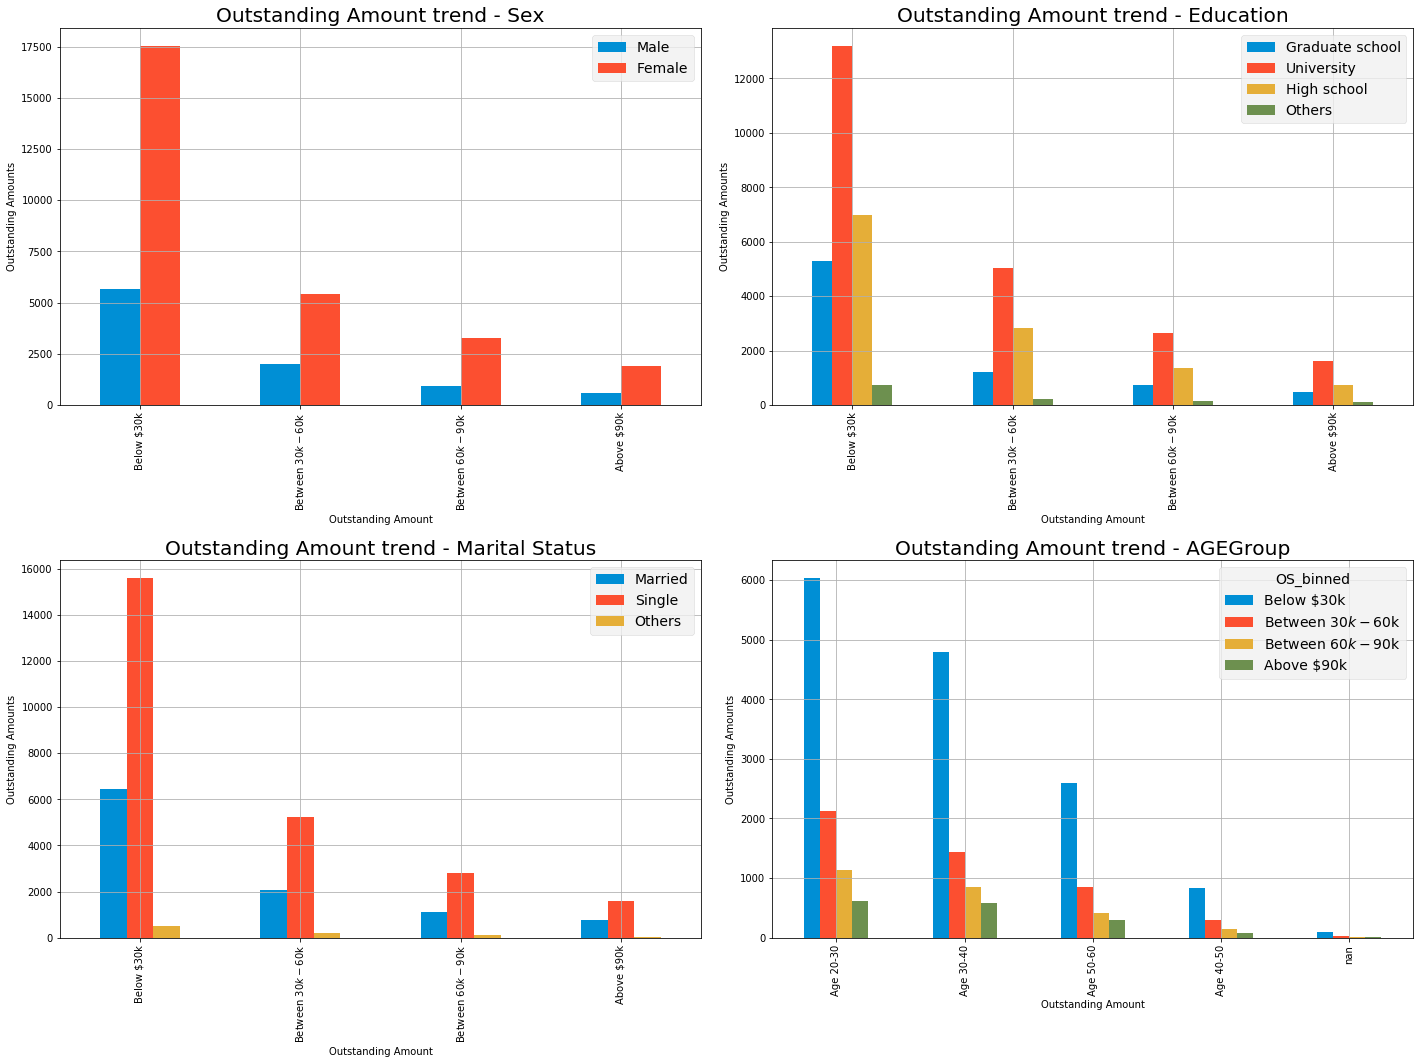

In [25]:
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme

# plot 1 - Outstanding trend - Sex

DefaultgroupBySexBucket = data[['OS_binned','SEX']].groupby(['OS_binned','SEX'])
DefaultgroupBySexBucketSum = DefaultgroupBySexBucket['SEX'].aggregate(np.sum).unstack()
DefaultgroupBySexBucketSum.plot(kind='bar',title='Outstanding Amount: By Sex', ax=ax1,label='SEX')
L=ax1.legend()
L.get_texts()[0].set_text('Male')
L.get_texts()[1].set_text('Female')

ax1.set(title='Outstanding Amount trend - Sex', xlabel='Outstanding Amount', ylabel='Outstanding Amounts')

# plot 2 - Outstanding trend - Education
DefaultgroupByEDUBucket = data[['OS_binned','EDUCATION']].groupby(['OS_binned','EDUCATION'])
DefaultgroupByEDUBucketSum = DefaultgroupByEDUBucket['EDUCATION'].aggregate(np.sum).unstack()
DefaultgroupByEDUBucketSum.plot(kind='bar',title='Outstanding Amount: By EDUCATION',ax=ax2)
L2=ax2.legend()
L2.get_texts()[0].set_text('Graduate school')
L2.get_texts()[1].set_text('University')
L2.get_texts()[2].set_text('High school')
L2.get_texts()[3].set_text('Others')

ax2.set(title='Outstanding Amount trend - Education', xlabel='Outstanding Amount', ylabel='Outstanding Amounts')

# plot 3 - Outstanding trend - Marital Status

DefaultgroupByMARBucket = data[['OS_binned','MARRIAGE']].groupby(['OS_binned','MARRIAGE'])
DefaultgroupByMARBucketSum = DefaultgroupByMARBucket['MARRIAGE'].aggregate(np.sum).unstack()
DefaultgroupByMARBucketSum.plot(kind='bar',title='Outstanding Amount: By Marital Status',ax=ax3)
L3=ax3.legend()
L3.get_texts()[0].set_text('Married')
L3.get_texts()[1].set_text('Single')
L3.get_texts()[2].set_text('Others')
ax3.set(title='Outstanding Amount trend - Marital Status', xlabel='Outstanding Amount', ylabel='Outstanding Amounts')

# plot 4 - Outstanding trend - Age

DefaultgroupByAgeBucket = pd.crosstab(data['AGEGroup'],data['OS_binned'])
#DefaultgroupByAgeBucket = pd.crosstab(data['OS_binned'],data['AGEGroup'])
DefaultgroupByAgeBucket.plot(kind='bar',title='Outstanding Amount: By AGEGroup',ax=ax4)

ax4.set(title='Outstanding Amount trend - AGEGroup', xlabel='Outstanding Amount', ylabel='Outstanding Amounts')

fig.tight_layout()
plt.show()

# 2. Number of customers with outstanding amount (in different outstanding amount buckets)

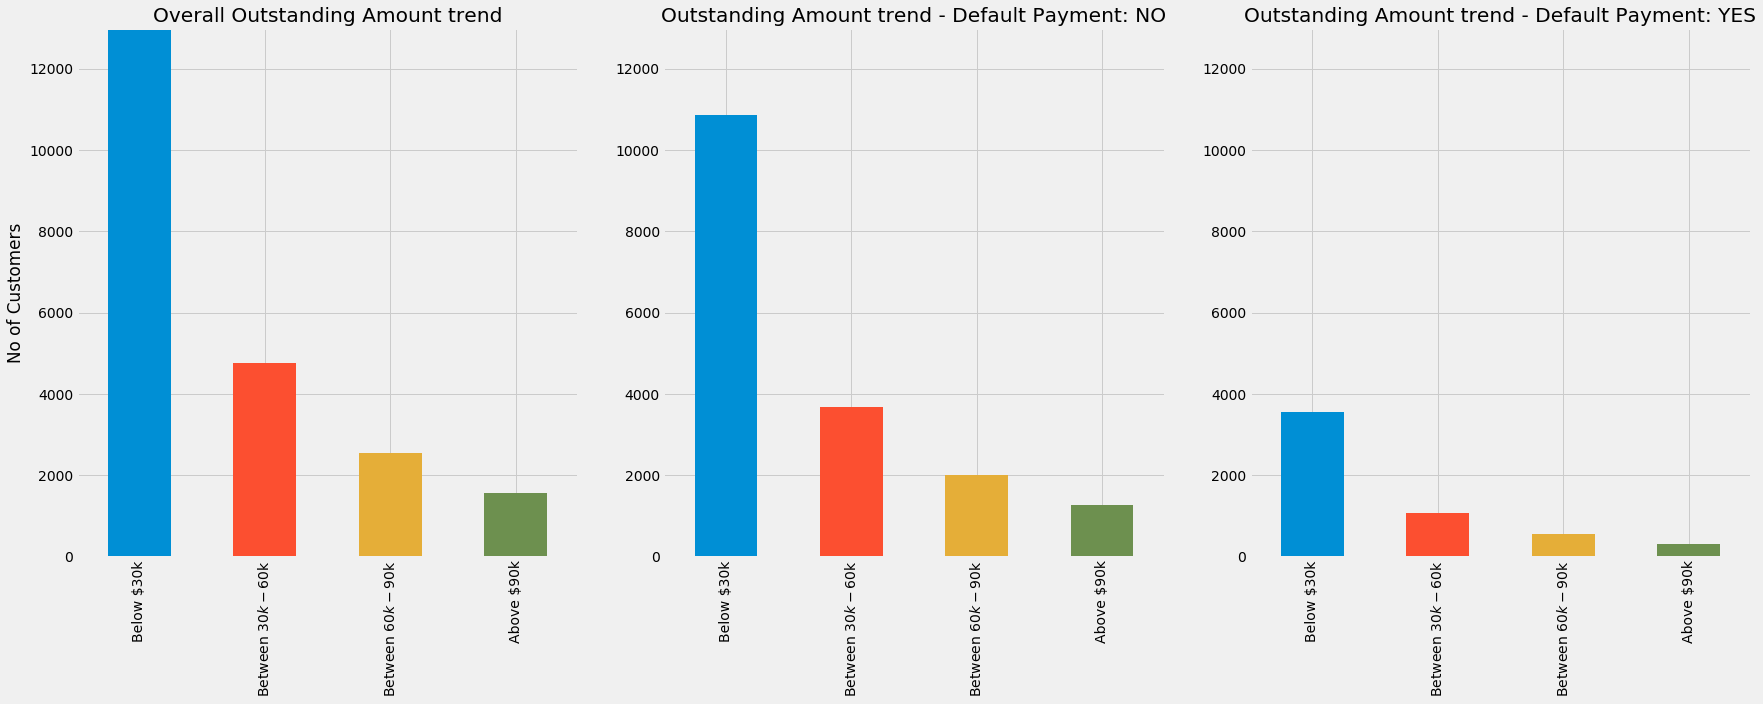

In [26]:
# Plot1: Outstanding Amount trend
fig = plt.figure(figsize=(25, 10)) 

ax1=fig.add_subplot(131)
var = data['OS_binned'].value_counts()

plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme


var.plot(x = 'OutStanding Amount',kind='bar',title='Overall Outstanding Amount trend',ylim =(0,13000),ax=ax1)

# Plot2: Outstanding Amount trend - DefaultPayment: NO
ax2=fig.add_subplot(132)

dataDefault0=data[data['DefaultPayment']==0]
dataDefault1=data[data['DefaultPayment']==1]

var0 = dataDefault0['OS_binned'].value_counts()
var1 = dataDefault1['OS_binned'].value_counts()

#plt.xlabel('Outstanding amount bucket')
#plt.ylabel('No of Customers')

#p1 = var0.plot(x = 'OutStanding Amount',kind='bar',title='Overall Outstanding Amount trend - Default Payment: NO',ylim =(0,13000), ax=ax2)
var0.plot(x = 'OutStanding Amount',kind='bar',title='Outstanding Amount trend - Default Payment: NO',ylim =(0,13000), ax=ax2)
#plt.show()

# Plot3: Outstanding Amount trend - DefaultPayment: YES

ax3=fig.add_subplot(133)

#fig = plt.figure(figsize=(10, 5)) 
#p2 = var1.plot(x = 'OutStanding Amount',kind='bar',title='Overall Outstanding Amount trend - Default Payment: YES',ylim =(0,13000), ax=ax3)
var1.plot(x = 'OutStanding Amount',kind='bar',title='Outstanding Amount trend - Default Payment: YES',ylim =(0,13000), ax=ax3)

ax1.set(ylabel='No of Customers')
plt.tight_layout()
plt.show()

# 3. Age of outstanding amount analysis

In [27]:
AgeDF = data.copy()
AgeDF.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEP-Outstanding',
       'AUG-Outstanding', 'JUL-Outstanding', 'JUN-Outstanding',
       'MAY-Outstanding', 'APR-Outstanding', 'DefaultPayment', 'OS_binned',
       'AGEGroup'],
      dtype='object')

In [28]:
AgeDF = AgeDF[(AgeDF['PAY_0'] > 0) & (AgeDF['PAY_2'] > 0) & (AgeDF['PAY_3'] > 0) & (AgeDF['PAY_4'] > 0) & (AgeDF['PAY_5'] > 0) & (AgeDF['PAY_6'] >= 0)]

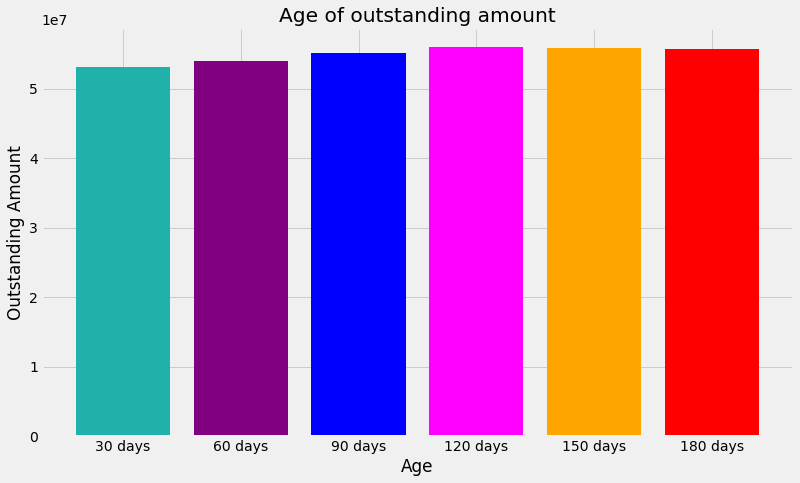

In [29]:
fig= plt.figure(figsize = (12,7))
ax1=fig.add_subplot(111)
df = AgeDF[['SEP-Outstanding','AUG-Outstanding','JUL-Outstanding','JUN-Outstanding','MAY-Outstanding','APR-Outstanding']].sum(axis=0)
df.rename(index={'SEP-Outstanding':'30 days','AUG-Outstanding':'60 days','JUL-Outstanding':'90 days','JUN-Outstanding':'120 days','MAY-Outstanding':'150 days','APR-Outstanding':'180 days'},inplace=True)
x= df.index
y=df
ax1.bar(x,y,color=['lightseagreen', 'Purple', 'Blue', 'magenta', 'Orange', 'Red'])
ax1.set(Title="Age of outstanding amount",xlabel="Age",ylabel="Outstanding Amount")
plt.show()


** No significant behaviour observed of outstanding amount / trend affect on the default behavior in next month

# Is there any relationship between in outstanding amount / trend with respect to age, education, marriage, credit limit?

# a. Default payment by demographic variables


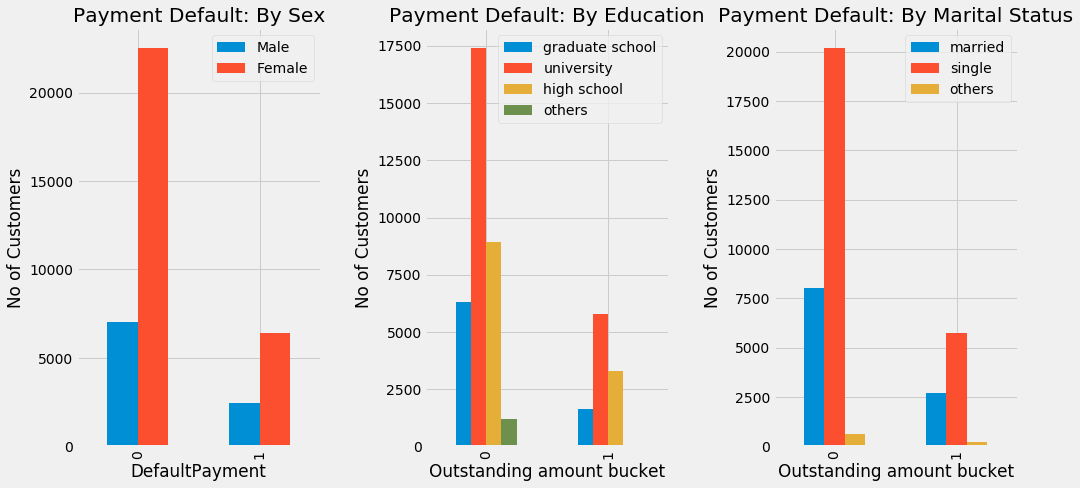

In [30]:
fig= plt.figure(figsize=(15,7))

# Payment Default: By Sex

ax1= fig.add_subplot(131)

DefaultgroupBySexBucket = data[['DefaultPayment','SEX']].groupby(['DefaultPayment','SEX'])
DefaultgroupBySexBucketSum = DefaultgroupBySexBucket['SEX'].aggregate(np.sum).unstack()
DefaultgroupBySexBucketSum.plot(kind='bar',title='Payment Default: By Sex',ax=ax1)
L=ax1.legend()
L.get_texts()[0].set_text('Male')
L.get_texts()[1].set_text('Female')
#plt.xlabel('Outstanding amount bucket')
plt.ylabel('No of Customers')


# Payment Default: By EDUCATION
ax2= fig.add_subplot(132)
DefaultgroupByEduBucket = data[['DefaultPayment','EDUCATION']].groupby(['DefaultPayment','EDUCATION'])
DefaultgroupByEduBucketSum = DefaultgroupByEduBucket['EDUCATION'].aggregate(np.sum).unstack()
DefaultgroupByEduBucketSum.plot(kind='bar',title='Payment Default: By Education',ax=ax2)
L=ax2.legend()
L.get_texts()[0].set_text('graduate school')
L.get_texts()[1].set_text('university')
L.get_texts()[2].set_text('high school')
L.get_texts()[3].set_text('others')
plt.xlabel('Outstanding amount bucket')
plt.ylabel('No of Customers')


# Payment Default: By Marital Status

ax3= fig.add_subplot(133)
DefaultgroupByMarriageBucket = data[['DefaultPayment','MARRIAGE']].groupby(['DefaultPayment','MARRIAGE'])
DefaultgroupByMarriageBucketSum = DefaultgroupByMarriageBucket['MARRIAGE'].aggregate(np.sum).unstack()
DefaultgroupByMarriageBucketSum.plot(kind='bar',title='Payment Default: By Marital Status',ax=ax3)
L=ax3.legend()
L.get_texts()[0].set_text('married')
L.get_texts()[1].set_text('single')
L.get_texts()[2].set_text('others')
plt.xlabel('Outstanding amount bucket')
plt.ylabel('No of Customers')

plt.tight_layout()
plt.show()

**The above plots do not show any significant impact of demographic variables on Default Payment

# b. Default payment by age & sex

In [31]:
# Default payment by Age and Sex
datasetDefaultNo = data.query('DefaultPayment==0')
datasetDefaultYes = data.query('DefaultPayment==1')

datasetDefaultNoMale = datasetDefaultNo.query('SEX==1')
datasetDefaultNoFemale = datasetDefaultNo.query('SEX==2')

datasetDefaultYesMale = datasetDefaultYes.query('SEX==1')
datasetDefaultYesFemale = datasetDefaultYes.query('SEX==2')

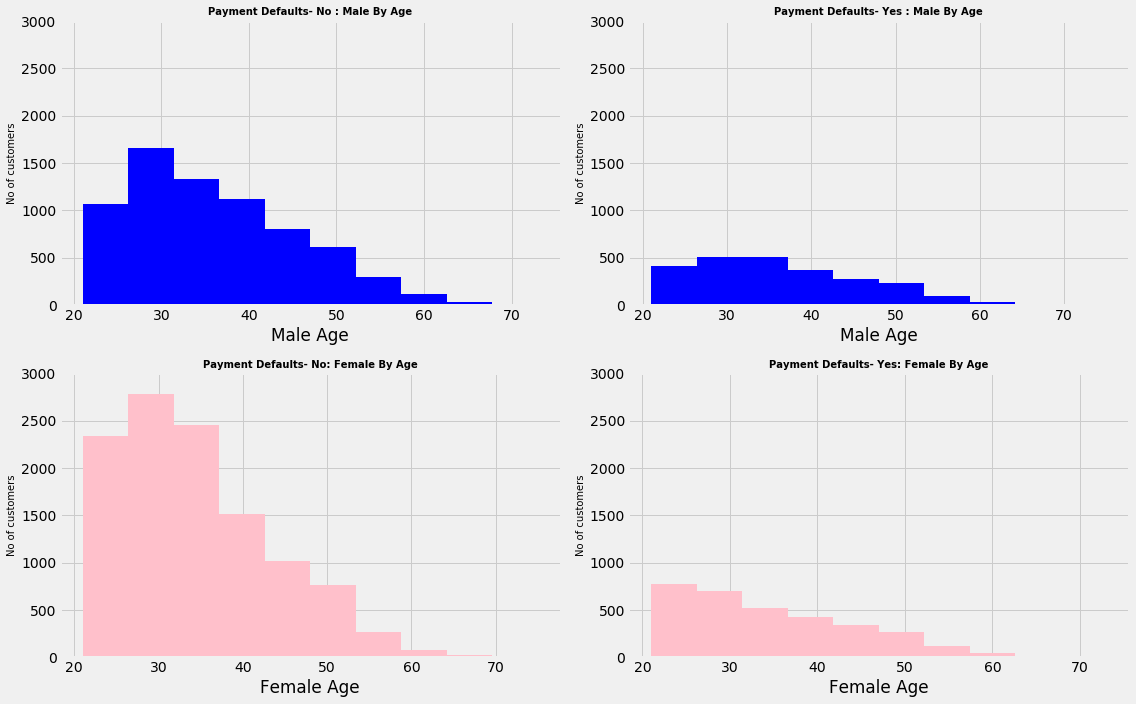

In [32]:
from matplotlib import gridspec

fig = plt.figure(figsize=(16, 10)) 
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme
#gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 
gs = gridspec.GridSpec(2, 2)#, width_ratios=[1, 1]) 

### Plot 1 "Male By Age"
ax0 = plt.subplot(gs[0,0])
ax0.set_title('Payment Defaults- No : Male By Age', fontsize=10,fontweight="bold")

ax0.set_xlabel('Male Age')
ax0.set_ylabel('No of customers',fontsize=10)

ax0.set_ylim(0, 3000)

plt.hist(datasetDefaultNoMale['AGE'],bins=10, histtype='bar', color='blue')

### Plot 2 "Male By Age"
ax1 = plt.subplot(gs[0,1])
ax1.set_title('Payment Defaults- Yes : Male By Age', fontsize=10,fontweight="bold")

ax1.set_xlabel('Male Age')
ax1.set_ylabel('No of customers',fontsize=10)

ax1.set_ylim(0, 3000)

plt.hist(datasetDefaultYesMale['AGE'],bins=10, histtype='bar', color='blue')

### Plot 3 "Female By Age"
ax2 = plt.subplot(gs[1,0])
ax2.set_title('Payment Defaults- No: Female By Age', fontsize=10,fontweight="bold")

ax2.set_xlabel('Female Age')
ax2.set_ylabel('No of customers',fontsize=10)
ax2.set_ylim(0, 3000)

plt.hist(datasetDefaultNoFemale['AGE'],bins=10, histtype='bar', color='pink')

### Plot 4 "Female By Age"

ax3 = plt.subplot(gs[1,1])
ax3.set_title('Payment Defaults- Yes: Female By Age', fontsize=10,fontweight="bold")

ax3.set_xlabel('Female Age')
ax3.set_ylabel('No of customers',fontsize=10)
ax3.set_ylim(0, 3000)

plt.hist(datasetDefaultYesFemale['AGE'],bins=10, histtype='bar', color='pink')

plt.tight_layout()
plt.show()

** The above plots do not show any significant impact of age and sex on Default Payment

# c. Outstanding amount Vs Credit Limit

In [33]:
dataset['AboveLimit']= dataset['SEP-Outstanding'] - dataset['LIMIT_BAL']
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT5,PAY_AMT6,DefaultPayment,APR-Outstanding,MAY-Outstanding,JUN-Outstanding,JUL-Outstanding,AUG-Outstanding,SEP-Outstanding,AboveLimit
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,1,0.0,0.0,0.0,689.0,2413.0,3913.0,-16087.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0.0,2000.0,1,1261.0,3455.0,2272.0,1682.0,725.0,2682.0,-117318.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,1000.0,5000.0,0,10549.0,13948.0,13331.0,12559.0,12527.0,27721.0,-62279.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,1069.0,1000.0,0,28547.0,27890.0,27214.0,48091.0,46214.0,44990.0,-5010.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,689.0,679.0,0,18452.0,18457.0,11940.0,25835.0,-31011.0,6617.0,-43383.0


In [34]:
# function to check the limit
def limitCheck(df, C, X):
    df_copy = df.copy()
    # 1 if crossed else 0
    df_copy['LimitExceed'] = (df_copy[C] >= X)*1
    return df_copy

In [35]:
dataset = limitCheck(dataset,'AboveLimit',0)

In [36]:
dataset['LimitExceed'].value_counts()

0    28935
1     1011
Name: LimitExceed, dtype: int64

In [37]:
DFct = pd.crosstab(dataset['LimitExceed'],dataset['DefaultPayment'])

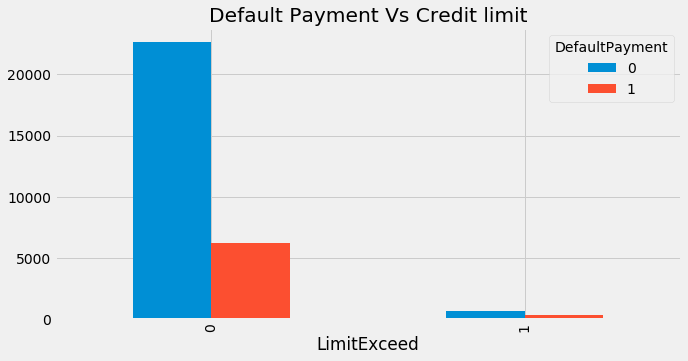

In [38]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
DFct.plot(kind='bar',ax=ax1)
ax1.set(title='Default Payment Vs Credit limit')
plt.show()

** The above plot does not show any significant impact of customer's outstanding amount (exceeding their limit) on Default Payment

# Target data distribution

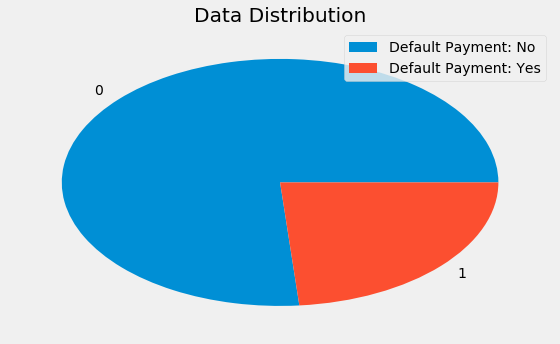

In [39]:
fig = plt.figure(figsize=(8,5))
datatemp = data['DefaultPayment'].value_counts()
datatemp.plot(kind = 'pie', title = 'Data Distribution')
L=plt.legend()
L.get_texts()[0].set_text('Default Payment: No')
L.get_texts()[1].set_text('Default Payment: Yes')
plt.ylabel('')

plt.tight_layout()
plt.show()

# Correlation 

In [40]:
corr = data.corr()
corr.style.background_gradient().set_precision(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEP-Outstanding,AUG-Outstanding,JUL-Outstanding,JUN-Outstanding,MAY-Outstanding,APR-Outstanding,DefaultPayment
ID,1,0.029,0.016,0.033,-0.029,0.018,-0.03,-0.0079,-0.019,0.001,-0.02,-0.021,0.0098,0.0033,0.00067,0.037,0.0038,0.016,-0.0072
LIMIT_BAL,0.029,1,0.05,-0.24,-0.1,0.12,-0.32,-0.35,-0.34,-0.32,-0.3,-0.28,-0.024,-0.092,-0.044,-0.011,0.01,0.013,-0.16
SEX,0.016,0.05,1,0.0054,-0.044,-0.086,-0.055,-0.068,-0.067,-0.057,-0.05,-0.038,-0.0048,-0.0071,0.003,0.0049,0.0047,0.0065,-0.041
EDUCATION,0.033,-0.24,0.0054,1,-0.15,0.19,0.12,0.14,0.13,0.12,0.11,0.096,0.074,0.075,0.063,0.047,0.038,0.038,0.034
MARRIAGE,-0.029,-0.1,-0.044,-0.15,1,-0.41,0.02,0.027,0.036,0.035,0.034,0.035,-0.0006,0.0037,-0.0036,-1.5e-05,-0.0058,-0.0038,-0.031
AGE,0.018,0.12,-0.086,0.19,-0.41,1,-0.034,-0.049,-0.051,-0.046,-0.052,-0.048,-0.00076,-0.0071,-0.0032,-0.0048,-0.0061,-0.0004,0.02
PAY_0,-0.03,-0.32,-0.055,0.12,0.02,-0.034,1,0.66,0.57,0.53,0.5,0.47,0.23,0.26,0.23,0.21,0.21,0.2,0.33
PAY_2,-0.0079,-0.35,-0.068,0.14,0.027,-0.049,0.66,1,0.77,0.65,0.61,0.57,0.29,0.3,0.27,0.26,0.25,0.24,0.26
PAY_3,-0.019,-0.34,-0.067,0.13,0.036,-0.051,0.57,0.77,1,0.78,0.69,0.64,0.28,0.34,0.3,0.29,0.28,0.27,0.23
PAY_4,0.001,-0.32,-0.057,0.12,0.035,-0.046,0.53,0.65,0.78,1,0.83,0.72,0.27,0.29,0.33,0.31,0.3,0.28,0.22


# Feature selction - based on correlation

In [41]:
# top features correated with DefaultPayments
SelectFeatures = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','DefaultPayment']

In [42]:
FinalData = data[SelectFeatures]
FinalData.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DefaultPayment
0,2,2,-1,-1,-2,-2,1
1,-1,2,0,0,0,2,1
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,-1,0,-1,0,0,0,0


# Prediction model: Default Payment using Machine Learning


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [44]:
FinalData.describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DefaultPayment
count,23956.000000,23956.000000,23956.000000,23956.000000,23956.000000,23956.000000,23956.000000
mean,0.040073,-0.060486,-0.135123,-0.181165,-0.229838,-0.255260,0.235933
std,1.121869,1.228231,1.232781,1.214463,1.178966,1.196043,0.424589
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000


In [45]:
# drop instances that have NA
before_rows = data.shape[0]
FinalData = FinalData.dropna()
after_rows = data.shape[0]
before_rows,after_rows,FinalData.shape

(23956, 23956, (23956, 7))

In [46]:
FinalData.columns

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'DefaultPayment'], dtype='object')

In [47]:
y = FinalData.iloc[:,6].values
y

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [48]:
FeatuesPredictors = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
X=FinalData[FeatuesPredictors].values
X

array([[ 2,  2, -1, -1, -2, -2],
       [-1,  2,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0],
       ...,
       [-1, -1, -1, -1,  0,  0],
       [ 4,  3,  2, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  0]], dtype=int64)

### More Importance to closest months

In [49]:
Importance = np.array([1.2,1.0,0.6,0.4,0.2,0.05])

In [50]:
X = X*Importance
X

array([[ 2.4,  2. , -0.6, -0.4, -0.4, -0.1],
       [-1.2,  2. ,  0. ,  0. ,  0. ,  0.1],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       ...,
       [-1.2, -1. , -0.6, -0.4,  0. ,  0. ],
       [ 4.8,  3. ,  1.2, -0.4,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

# Data split: Training set and Test set 

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [52]:
# scale
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# Final Model

In [53]:
# Fit Random forest to the training set
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 50,criterion='entropy',random_state=0)
#RF_classifier = RandomForestClassifier(n_estimators = 5,random_state=0)
RF_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [54]:
y_RFpredictions = RF_classifier.predict(X_test)

In [55]:
# Measures Accuracy of the Classifier
RFAccuracy = round(accuracy_score(y_true=y_test,y_pred=y_RFpredictions),3)
RFAccuracy

0.807

In [56]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_RFpredictions)
cm

array([[5159,  331],
       [1055,  642]], dtype=int64)

In [57]:
from sklearn.metrics import roc_curve
fpr, tpr, _ =roc_curve(y_test,y_RFpredictions)

In [58]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6590116169861525


In [59]:
from sklearn.metrics import precision_recall_fscore_support
report_lr= precision,recall,fbeta_score,support = precision_recall_fscore_support(y_test,y_RFpredictions)

precision,recall,fbeta_score,support



(array([0.83022208, 0.65981501]),
 array([0.93970856, 0.37831467]),
 array([0.88157895, 0.48089888]),
 array([5490, 1697], dtype=int64))

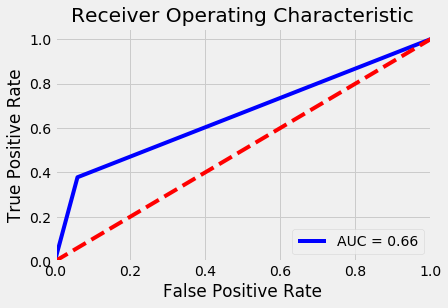

In [60]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# model statistics

In [61]:
print('*******************************************************************************************')

print('--- Confusion Matrix ---\n')

print(cm)

print('\n --- Accuracy ---\n')

print(RFAccuracy*100,'%')

print('\n --- Classification Report ---\n')

from sklearn.metrics import classification_report
target=['0','1']
print(classification_report(y_test,y_RFpredictions, target_names=target))

print('*******************************************************************************************')

*******************************************************************************************
--- Confusion Matrix ---

[[5159  331]
 [1055  642]]

 --- Accuracy ---

80.7 %

 --- Classification Report ---

             precision    recall  f1-score   support

          0       0.83      0.94      0.88      5490
          1       0.66      0.38      0.48      1697

avg / total       0.79      0.81      0.79      7187

*******************************************************************************************
